In [1]:
import numpy as np
import scipy.linalg as la
import utls
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')
plt.rc('font',size=14)

In [2]:
sigma = 10
beta = 8/3
rho = 160
tau = 1
x0 = [.1, .1, 100]

period = 1.154*tau

num_periods = 50
sampling_rate = 4096
t_sim = np.linspace(0, num_periods*period, int(num_periods*sampling_rate))
dt_sim = t_sim[1] - t_sim[0]

lorenz_sim = utls.simulate_lorenz(dt_sim, t_sim.size, x0=x0, sigma=sigma, rho=rho, beta=beta, tau=tau)[0]

initial_samples = int(10*sampling_rate)
t = t_sim[:-initial_samples]
lorenz_sol = lorenz_sim[0:1, initial_samples:]

In [12]:
num_periods_sub = 5
sampling_rate_sub = 128

t_max_idx = int(num_periods_sub * period / dt_sim) + 2
spacing = sampling_rate // sampling_rate_sub

t_sub = t[:t_max_idx:spacing]
dt_sub = t_sub[1] - t_sub[0]

training_data = lorenz_sol[:,:t_max_idx:spacing]

In [13]:
n_delay_coords = 128
delay_spacing = 1
rank = 12

dmd = utls.DMD(trunc_method='hard', threshold=rank, n_delay_coords=n_delay_coords, spacing=delay_spacing)
dmd.fit(training_data, dt_sub)
dmd_recon = dmd.reconstruct(t, imag_evals=True)

(0.0, 11.54, -43.582951134894955, 43.58327021536368)

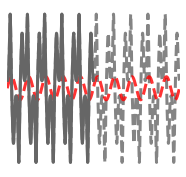

In [14]:
plt.figure(figsize=(10.5,3))
plt.subplot(1,3,1)
plt.plot(t, lorenz_sol[0], '--', color='#666666', alpha=0.8, linewidth=3)
plt.plot(t, dmd_recon[0], '--', alpha=0.8, linewidth=3, color='red')
plt.plot(t_sub, training_data[0], linewidth=3, color='#666666')
plt.xlim([0, 10*period])
plt.axis('off')